In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn import metrics

In [ ]:
train_data = pd.read_csv("/content/data/mnist_train.csv")

In [ ]:
train_data.shape

(60000, 785)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

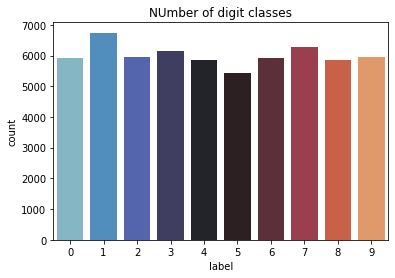

In [ ]:
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 1')

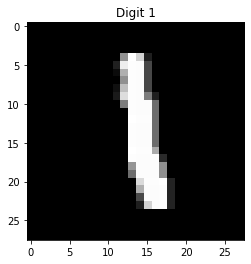

In [ ]:
four = train_data.iloc[6, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 1")

accuracy test: 0.6995833333333333
accuracy train: 0.6980555555555555
accuracy test: 0.8373333333333334
accuracy train: 0.8365
accuracy test: 0.9055833333333333
accuracy train: 0.9167222222222222
accuracy test: 0.9229166666666667
accuracy train: 0.9423333333333334


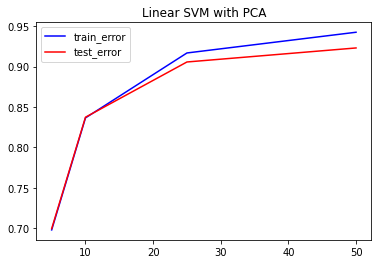

In [ ]:
from scipy.sparse.linalg.eigen import test
dimensions=[5,10,25,50]
train_errors=[]
test_errors=[]
for i in dimensions:

  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0
  x=StandardScaler().fit_transform(x_train)
  pca=PCA(i)
  x=pca.fit_transform(x)

  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)

  model_linear=SVC(kernel='linear')
  model_linear.fit(X_train,y_train)
  y_pred_test=model_linear.predict(X_test)
  y_pred_train=model_linear.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("Linear SVM with PCA")
plt.legend()



accuracy test: 0.75275
accuracy train: 0.7521111111111111
accuracy test: 0.9061666666666667
accuracy train: 0.914
accuracy test: 0.9545
accuracy train: 0.9717222222222223
accuracy test: 0.9630833333333333
accuracy train: 0.9837777777777778


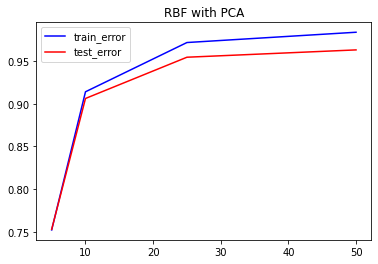

In [ ]:
dimensions=[5,10,25,50]
train_errors=[]
test_errors=[]
for i in dimensions:
  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0
  x=StandardScaler().fit_transform(x_train)
  pca=PCA(i)
  x=pca.fit_transform(x)

  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)

  model=SVC(C=10,gamma=0.001,kernel='rbf')
  model.fit(X_train,y_train)
  y_pred_test=model.predict(X_test)
  y_pred_train=model.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("RBF with PCA")
plt.legend()

accuracy test: 0.8381666666666666
accuracy train: 0.8402222222222222
accuracy test: 0.8964166666666666
accuracy train: 0.9011111111111111


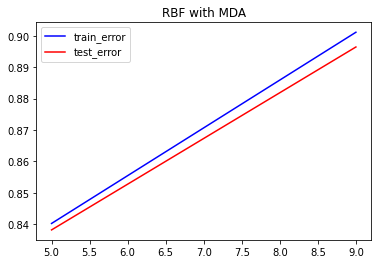

In [ ]:
from scipy.sparse.linalg.eigen import test
dimensions=[5,9]
train_errors=[]
test_errors=[]
for i in dimensions:
  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0

  lda=LinearDiscriminantAnalysis(n_components=i)
  x=lda.fit(x_train,y_train).transform(x_train)
  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)

  model=SVC(C=10,gamma=0.001,kernel='rbf')
  model.fit(X_train,y_train)
  y_pred_test=model.predict(X_test)
  y_pred_train=model.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("RBF with MDA")
plt.legend()

accuracy test: 0.8385833333333333
accuracy train: 0.84
accuracy test: 0.8963333333333333
accuracy train: 0.9013333333333333


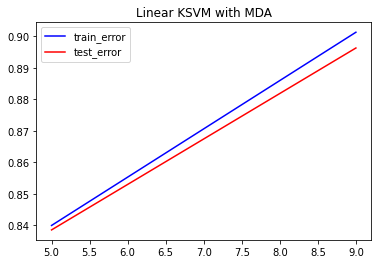

In [ ]:
dimensions=[5,9]
train_errors=[]
test_errors=[]
for i in dimensions:
  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0
  lda=LinearDiscriminantAnalysis(n_components=i)
  x=lda.fit(x_train,y_train).transform(x_train)
  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)

  model_linear=SVC(kernel='linear')
  model_linear.fit(X_train,y_train)
  y_pred_test=model_linear.predict(X_test)
  y_pred_train=model_linear.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("Linear KSVM with MDA")
plt.legend()